# Домашнее задание №1

Темы "Введение в МатСтат" и "Виды статистических оценок и характеристики"

Общие положения:
- Макс кол-во баллов за ДЗ - 25 баллов
- Качество оформления и кода играет роль

Список заданий:
1. Посчитайте кол-во уникальных жанров. (1 балл)
2. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по типу аниме `type`. (1 балл)
3. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по жанрам `genre`. (1 балл)
4. Посчитайте и визуализируйте квартили Q1, Q2 и Q3 с интерквантильным размахом по жанрам `genre` и типу аниме `type`. (1 балл)
5. Насколько часто встречаются аниме с одним или двумя жанрами? (1 балл)
6. Сколько в среднем эпизодов приходится на аниме типа == `TV`? (1 балл)
7. По правилу трех сигм на столбцах `episodes`, `rating` и `members` оцените кол-во аномалий. (1 балл)
  - если по одному из столбцов аниме не попадает в интервал трех сигм, то оно считается аномальным
8. Оцените и визуализируйте корреляцию среднего рейтинга жанра со средними кол-вом эпизодов и кол-вом подписчиков. (1 балл)
9. Оцените и визуализируйте корреляцию кол-ва жанров у аниме с его рейтингом и кол-вом подписчиков по каждому типу аниме `type`. (1 балл)
10. Оцените и визуализируйте корреляцию длины названия аниме `name` с его рейтингом, кол-вом жанров, эпизодов и подписчиков. (1 балл)



In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import bernoulli, binom, geom, poisson, expon, norm, uniform
from ipywidgets import interact, FloatSlider, IntSlider
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
!curl -O https://raw.githubusercontent.com/practical-jupyter/sample-data/refs/heads/master/anime/anime.csv >> anime.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  778k  100  778k    0     0  2154k      0 --:--:-- --:--:-- --:--:-- 2157k


Описание датафрейма:
- `anime_id` - ID
- `name` - название
- `genre` - жанр (строка с пречисление через запятую)
- `type` - формат
- `episodes` - кол-во эпизодов
- `rating` - средний рейтинг
- `members` - кол-во смотрящих

In [ ]:
df = pd.read_csv('anime.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10486 entries, 0 to 10485
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10486 non-null  int64  
 1   name      10486 non-null  object 
 2   genre     10424 non-null  object 
 3   type      10463 non-null  object 
 4   episodes  10486 non-null  object 
 5   rating    10275 non-null  float64
 6   members   10486 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 573.6+ KB


In [ ]:
df.head()

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266

## 1. Посчитайте кол-во уникальных жанров. (1 балл)

In [ ]:
genres = df['genre'].dropna().str.split(', ').explode().unique()
# print(*genres)
print(f"Количество уникальных жанров: {len(genres)}")

Количество уникальных жанров: 39


## 2. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по типу аниме type. (1 балл)

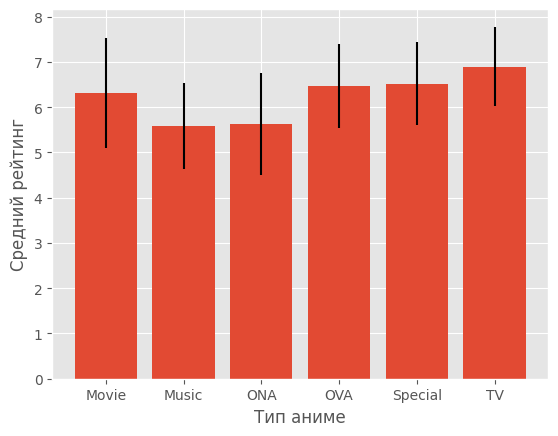

In [ ]:
type_stats = df.groupby('type')['rating'].agg(['mean', 'std']).reset_index()
type_stats.columns = ['type', 'mean_rating', 'std_rating']

plt.bar(type_stats['type'], type_stats['mean_rating'], yerr=type_stats['std_rating']);
plt.ylabel('Средний рейтинг')
plt.xlabel('Тип аниме')
plt.show()

## 3. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по жанрам. (1 балл)

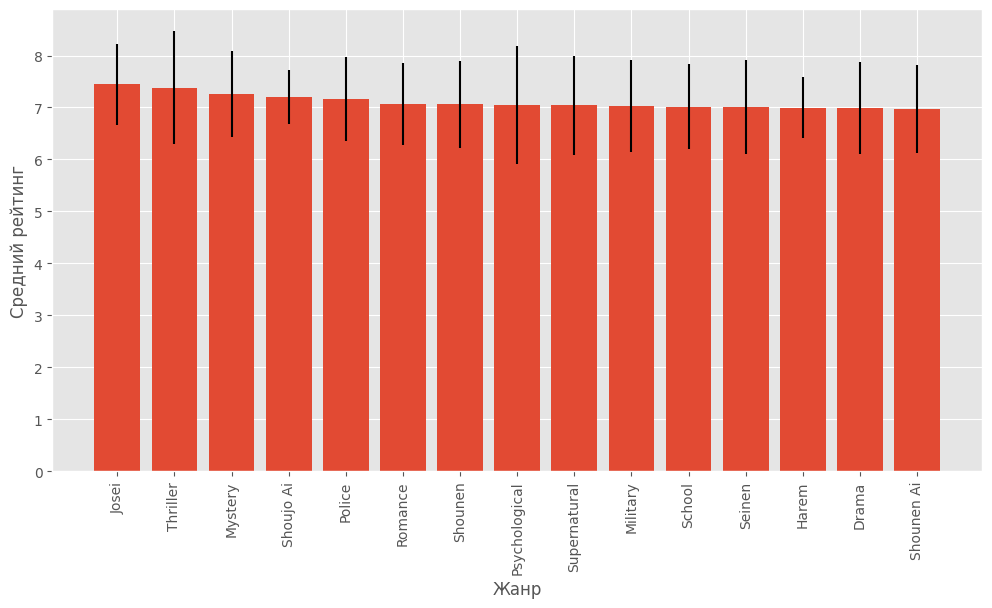

In [ ]:
df_clean = df.dropna(subset='rating')
df_clean.set_index('rating', inplace=True)
genre_exploded = df_clean.genre.str.split(', ').explode()
genre_exploded = genre_exploded.reset_index()
genre_stats = genre_exploded.groupby('genre').agg({'rating': ['mean', 'std']}).reset_index()
genre_stats.columns = ['genre', 'mean_rating', 'std_rating']
top_genres = genre_stats.sort_values(by='mean_rating', ascending=False).head(15)

plt.figure(figsize=(12, 6))
plt.bar(top_genres['genre'], top_genres['mean_rating'], yerr=top_genres['std_rating']);
plt.ylabel('Средний рейтинг')
plt.xlabel('Жанр')
plt.xticks(rotation=90)
plt.show()

## 4. Посчитайте и визуализируйте квартили Q1, Q2 и Q3 с интерквантильным размахом по жанрам genre и типу аниме type. (1 балл)

            genre      Q1     Q2      Q3     IQR
0          Action  6.3000  6.910  7.4400  1.1400
1       Adventure  6.3100  6.790  7.3200  1.0100
2            Cars  5.5700  6.595  7.4950  1.9250
3          Comedy  6.0600  6.740  7.3400  1.2800
4        Dementia  4.2150  4.870  5.5000  1.2850
5          Demons  6.2100  6.850  7.5200  1.3100
6           Drama  6.4300  7.040  7.5900  1.1600
7         Fantasy  6.1500  6.740  7.3000  1.1500
8            Game  6.3650  6.900  7.3200  0.9550
9           Harem  6.5875  7.050  7.3900  0.8025
10     Historical  6.2100  6.780  7.4600  1.2500
11         Horror  5.8300  6.530  7.2300  1.4000
12          Josei  6.9100  7.530  8.0150  1.1050
13           Kids  5.4500  6.200  6.7500  1.3000
14          Magic  6.3600  6.880  7.4000  1.0400
15   Martial Arts  6.2800  7.005  7.4500  1.1700
16          Mecha  6.2400  6.730  7.2500  1.0100
17       Military  6.5200  7.130  7.6550  1.1350
18          Music  5.1600  5.925  6.7475  1.5875
19        Mystery  6

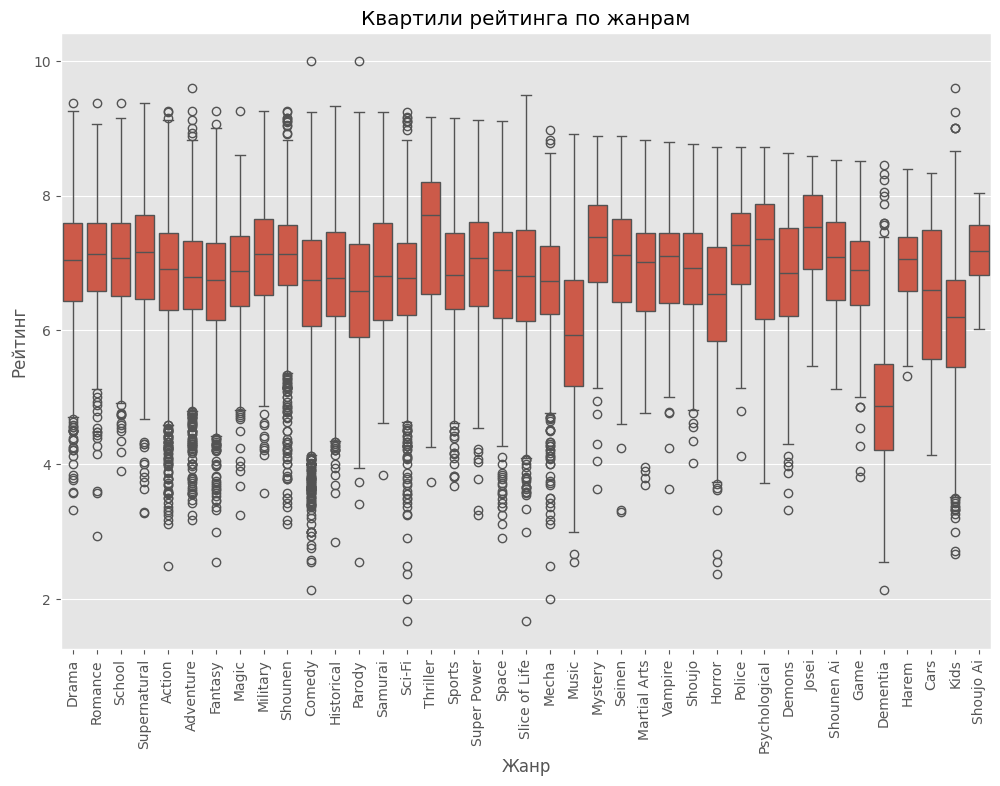

      type    Q1     Q2    Q3   IQR
0    Movie  5.40  6.450  7.25  1.85
1    Music  5.01  5.615  6.15  1.14
2      ONA  4.86  5.750  6.41  1.55
3      OVA  5.89  6.460  7.11  1.22
4  Special  6.05  6.630  7.14  1.09
5       TV  6.43  6.940  7.47  1.04


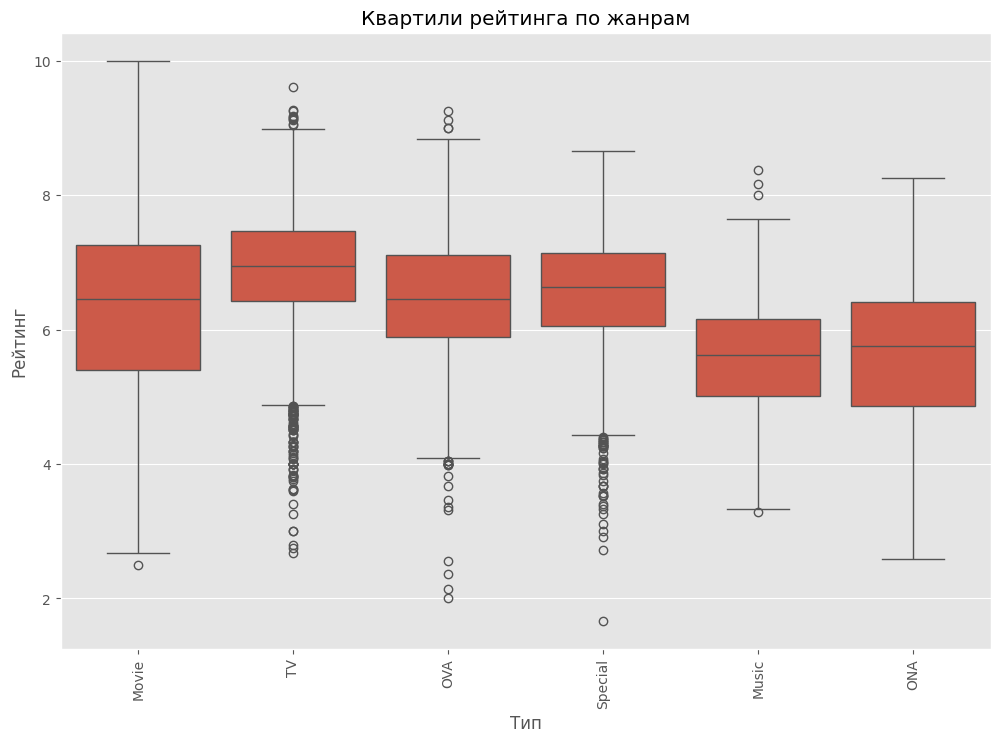

In [ ]:
df_genres = df.assign(genre=df['genre'].str.split(', ')).explode('genre').dropna(subset=['genre', 'rating'])

# Группировка данных по жанрам и расчет квартилей и IQR
genre_stats = df_genres.groupby('genre')['rating'].quantile([0.25, 0.50, 0.75]).unstack().reset_index()
genre_stats.columns = ['genre', 'Q1', 'Q2', 'Q3']
genre_stats['IQR'] = genre_stats['Q3'] - genre_stats['Q1']
print(genre_stats)

plt.figure(figsize=(12,8))
sns.boxplot(x='genre', y='rating', data=df_genres)
plt.title('Квартили рейтинга по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Рейтинг')
plt.xticks(rotation=90)

plt.show()

# Группировка данных по жанрам и расчет квартилей и IQR
type_stats = df.groupby('type')['rating'].quantile([0.25, 0.50, 0.75]).unstack().reset_index()
type_stats.columns = ['type', 'Q1', 'Q2', 'Q3']
type_stats['IQR'] = type_stats['Q3'] - type_stats['Q1']
print(type_stats)


plt.figure(figsize=(12,8))
sns.boxplot(x='type', y='rating', data=df)
plt.title('Квартили рейтинга по жанрам')
plt.xlabel('Тип')
plt.ylabel('Рейтинг')
plt.xticks(rotation=90)

plt.show()

## 5. Насколько часто встречаются аниме с одним или двумя жанрами? (1 балл)

---



   genre_count  frequency
0            2       2479
2            1       1957


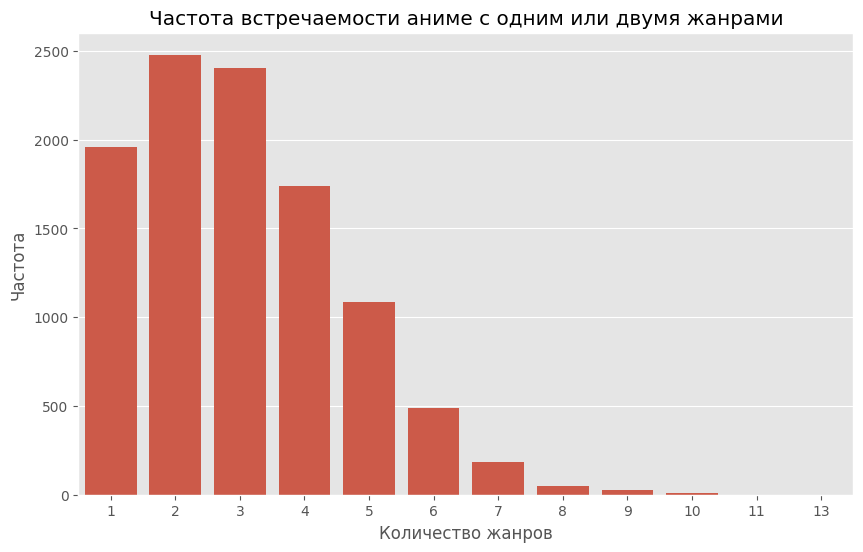

In [ ]:
genre_count = df['genre'].dropna().str.split(', ').apply(len)
genre_count_stats = genre_count.value_counts().reset_index()
genre_count_stats.columns = ['genre_count', 'frequency']

print(genre_count_stats[genre_count_stats['genre_count'].isin([1, 2])])

fgsize = (10, 6)
plt.figure(figsize=fgsize)
sns.barplot(x='genre_count', y='frequency', data=genre_count_stats)
plt.title('Частота встречаемости аниме с одним или двумя жанрами')
plt.xlabel('Количество жанров')
plt.ylabel('Частота')
plt.show()

## 6. Сколько в среднем эпизодов приходится на аниме типа == TV? (1 балл)

In [ ]:
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
avg_episodes_tv = df[df['type'] == 'TV']['episodes'].mean()
print(f"Среднее количество эпизодов для аниме типа TV: {avg_episodes_tv:.2f}")

Среднее количество эпизодов для аниме типа TV: 37.38


## 7. По правилу трех сигм на столбцах episodes, rating и members оцените кол-во аномалий. (1 балл)
если по одному из столбцов аниме не попадает в интервал трех сигм, то оно считается аномальным


In [ ]:
def count_anomalies(series):
    mean = series.mean()
    std = series.std()
    return ((series < mean - 3 * std) | (series > mean + 3 * std)).sum()

anomalies_episodes = count_anomalies(df['episodes'].dropna())
anomalies_rating = count_anomalies(df['rating'].dropna())
anomalies_members = count_anomalies(df['members'].dropna())

print(f"Количество аномалий в столбце episodes: {anomalies_episodes}")
print(f"Количество аномалий в столбце rating: {anomalies_rating}")
print(f"Количество аномалий в столбце members: {anomalies_members}")

Количество аномалий в столбце episodes: 63
Количество аномалий в столбце rating: 41
Количество аномалий в столбце members: 218


## 8. Оцените и визуализируйте корреляцию среднего рейтинга жанра со средними кол-вом эпизодов и кол-вом подписчиков. (1 балл)

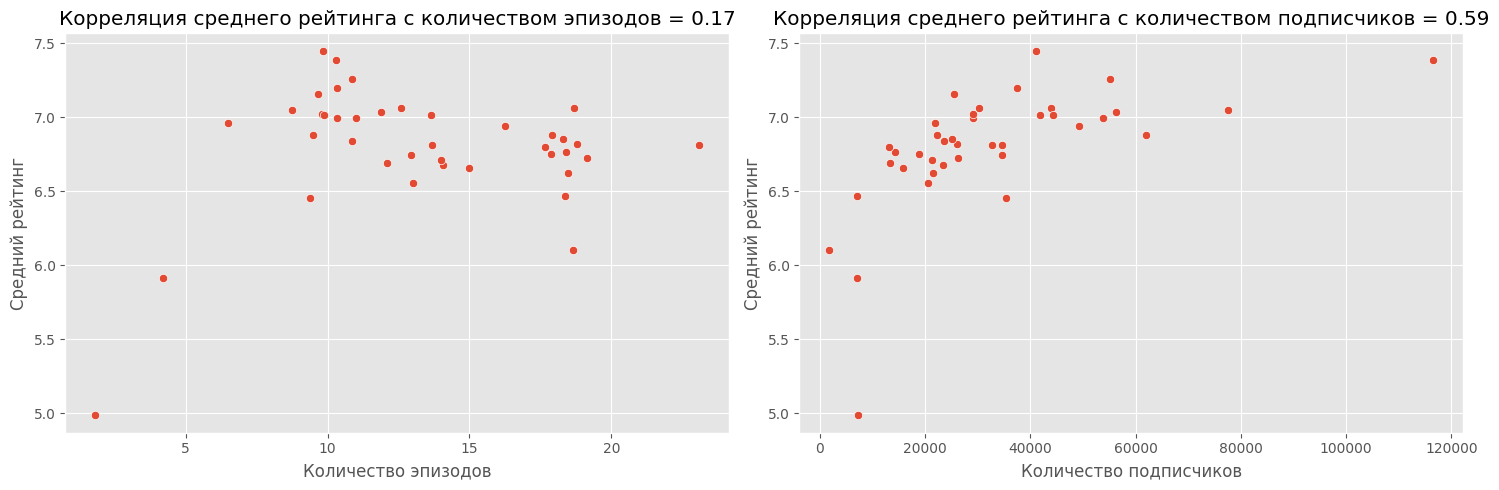

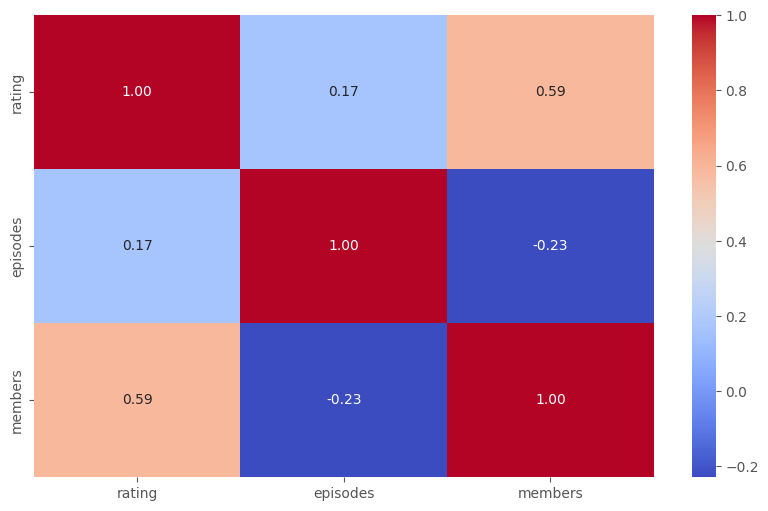

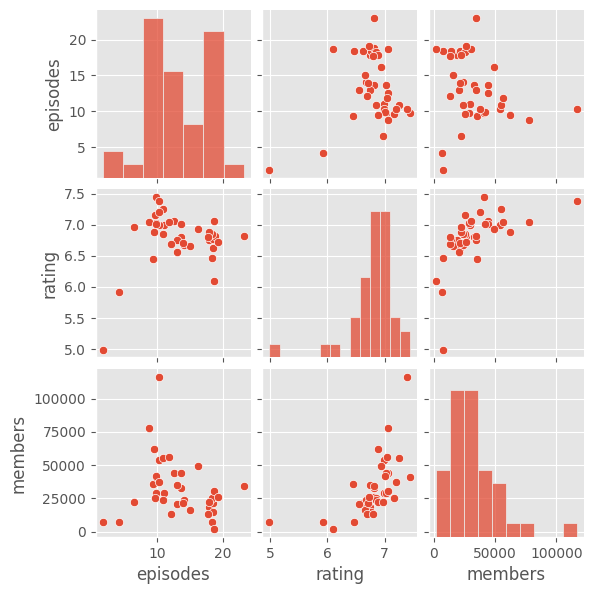

In [ ]:
df_genres = df.set_index(['rating', 'episodes', 'members']).genre.str.split(', ').explode().reset_index()
genres_mean_df = df_genres.groupby('genre').agg('mean')

plt.figure(figsize=(15, 5))
correlation = genres_mean_df['episodes'].corr(genres_mean_df['rating']).round(2)
plt.subplot(1, 2, 1)
sns.scatterplot(x='episodes', y='rating', data=genres_mean_df)
plt.title(f'Корреляция среднего рейтинга с количеством эпизодов = {correlation}')
plt.xlabel('Количество эпизодов')
plt.ylabel('Средний рейтинг')

correlation = genres_mean_df['members'].corr(genres_mean_df['rating']).round(2)
plt.subplot(1, 2, 2)
sns.scatterplot(x='members', y='rating', data=genres_mean_df)
plt.title(f'Корреляция среднего рейтинга с количеством подписчиков = {correlation}')
plt.xlabel('Количество подписчиков')
plt.ylabel('Средний рейтинг')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(genres_mean_df.corr(method='pearson', numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
sns.pairplot(genres_mean_df[['episodes', 'rating', 'members']], height=2, kind='scatter')
plt.show()

## 9. Оцените и визуализируйте корреляцию кол-ва жанров у аниме с его рейтингом и кол-вом подписчиков по каждому типу аниме type. (1 балл)

In [ ]:
def get_pairs(data: list) -> list:
  pairs = []

  for i in range(len(data)):
      for j in range(i + 1, len(data)):
          pair = (data[i], data[j])
          pairs.append(pair)
  return pairs

                    num_genres    rating   members
type                                              
Movie   num_genres    1.000000  0.461966  0.282891
        rating        0.461966  1.000000  0.423784
        members       0.282891  0.423784  1.000000
Music   num_genres    1.000000  0.048063  0.074358
        rating        0.048063  1.000000  0.416781
        members       0.074358  0.416781  1.000000
ONA     num_genres    1.000000  0.347855  0.164566
        rating        0.347855  1.000000  0.403003
        members       0.164566  0.403003  1.000000
OVA     num_genres    1.000000  0.301141  0.230221
        rating        0.301141  1.000000  0.400823
        members       0.230221  0.400823  1.000000
Special num_genres    1.000000  0.352863  0.203912
        rating        0.352863  1.000000  0.439028
        members       0.203912  0.439028  1.000000
TV      num_genres    1.000000  0.413071  0.290038
        rating        0.413071  1.000000  0.476861
        members       0.290038 

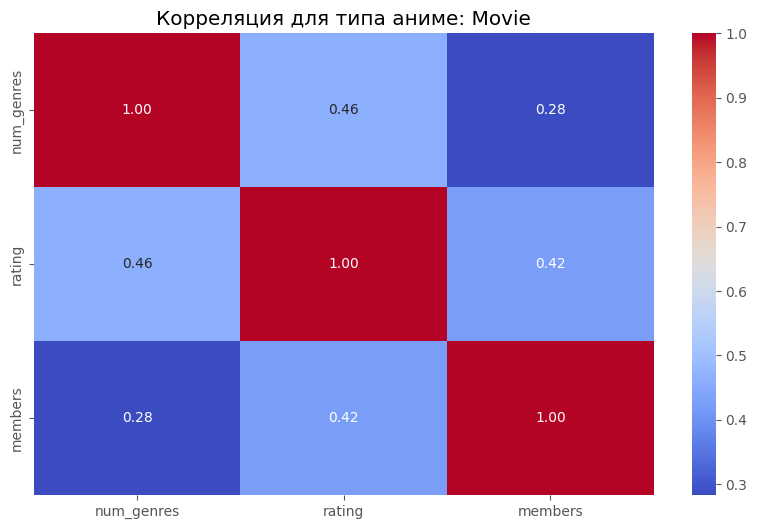

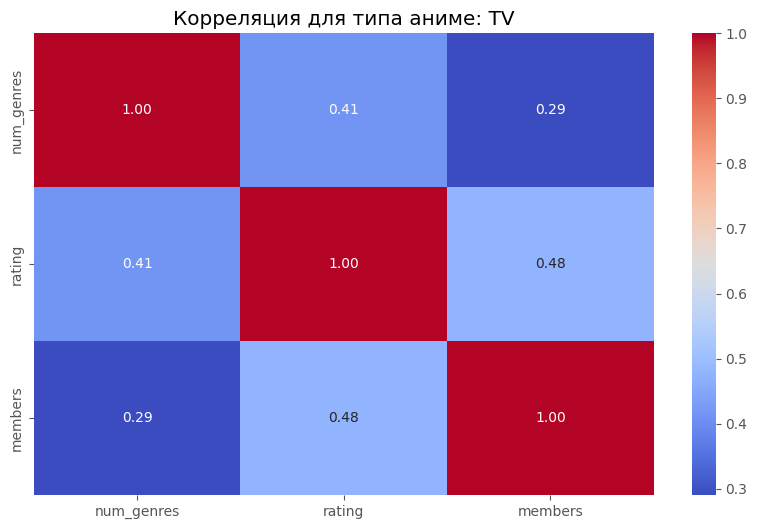

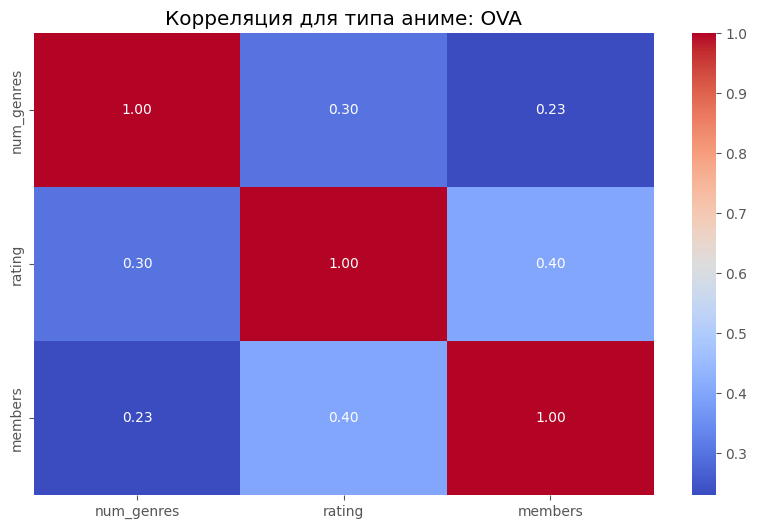

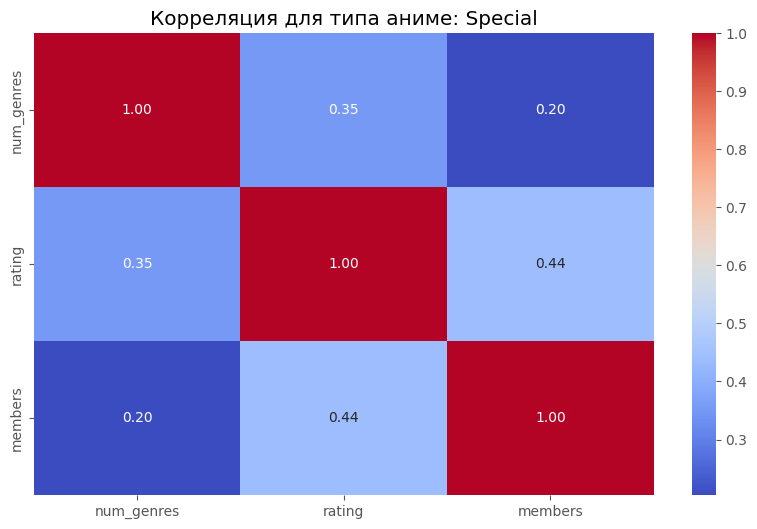

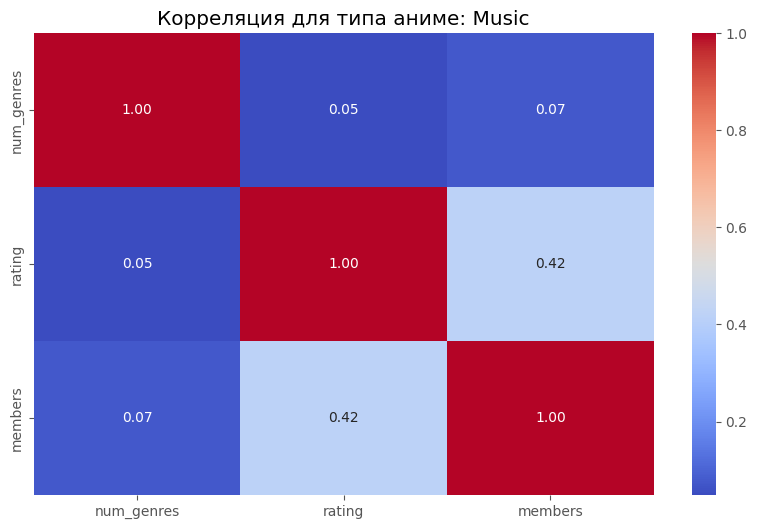

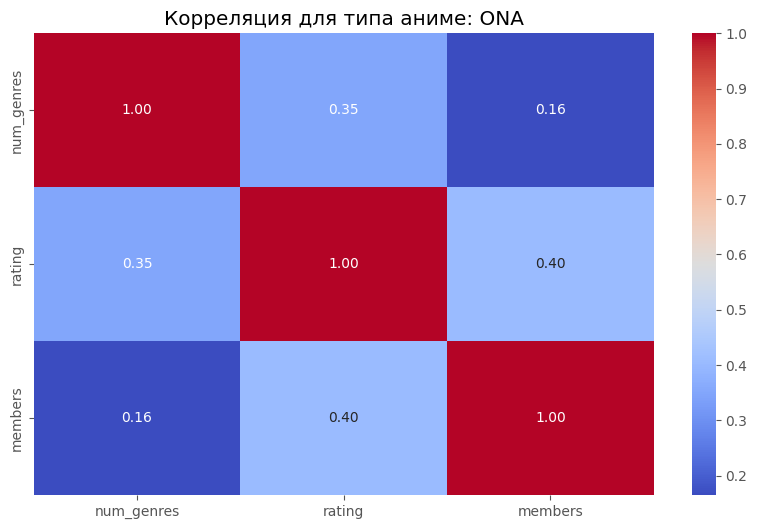

↓↓↓ Pairplot для типа: ('Movie', 'TV') ↓↓↓


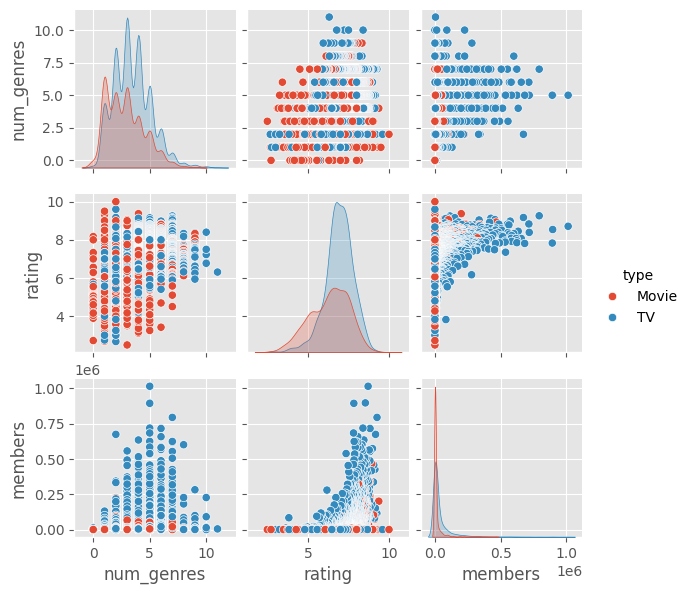

↓↓↓ Pairplot для типа: ('Movie', 'OVA') ↓↓↓


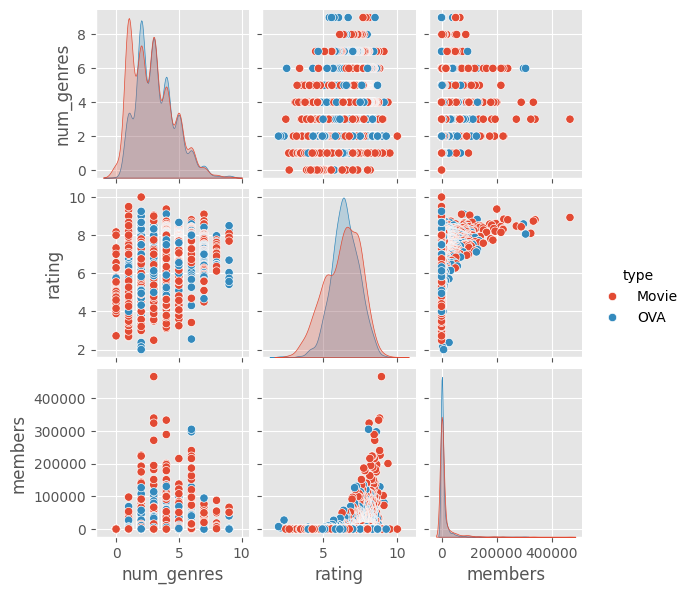

↓↓↓ Pairplot для типа: ('Movie', 'Special') ↓↓↓


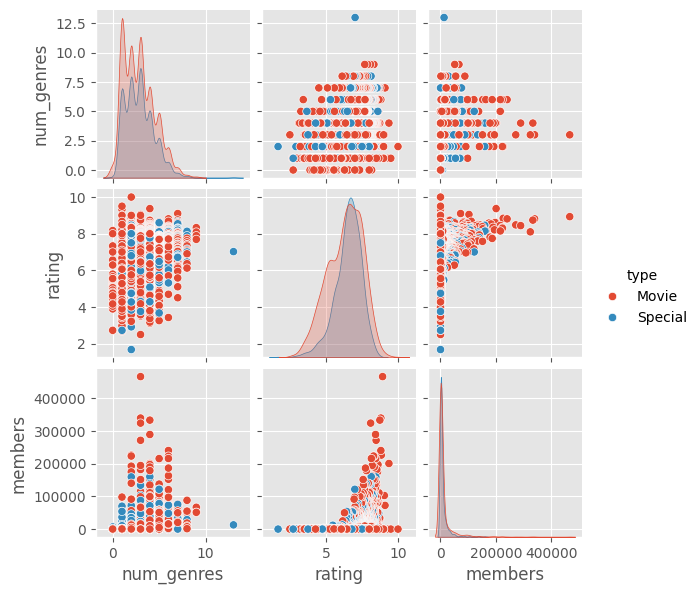

↓↓↓ Pairplot для типа: ('Movie', 'Music') ↓↓↓


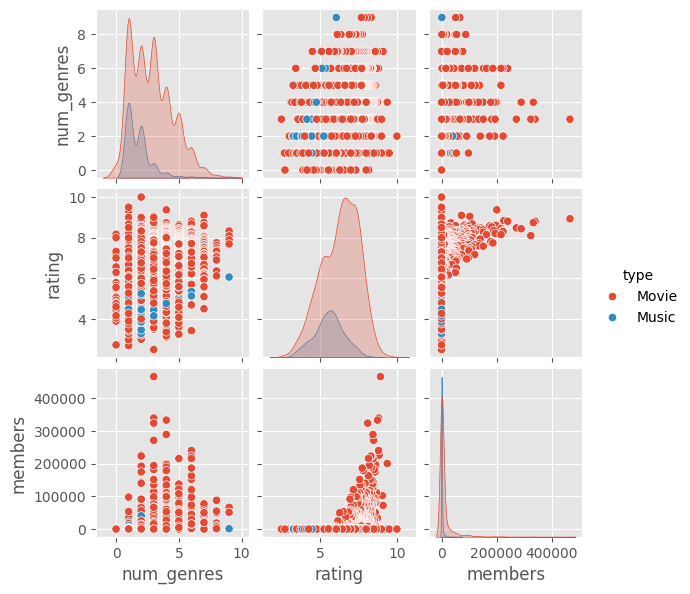

↓↓↓ Pairplot для типа: ('Movie', 'ONA') ↓↓↓


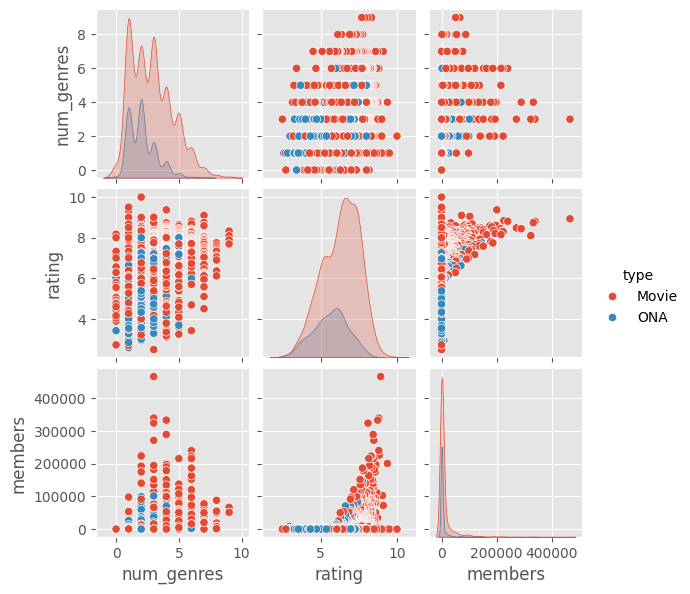

↓↓↓ Pairplot для типа: ('TV', 'OVA') ↓↓↓


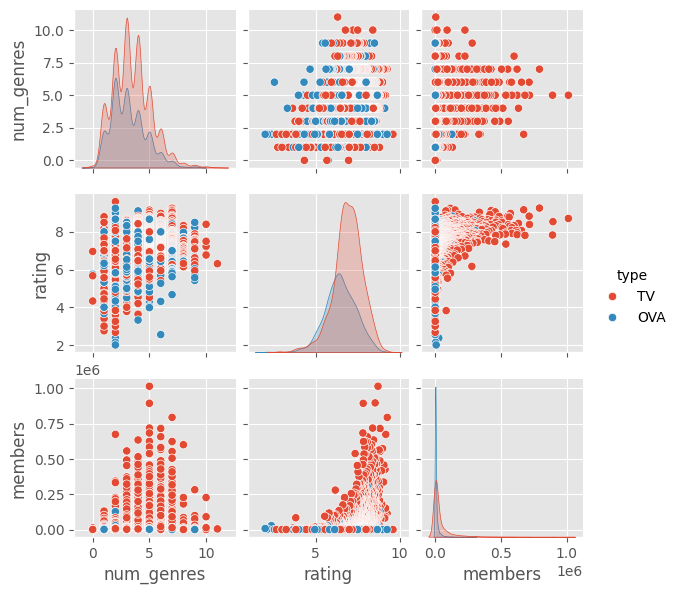

↓↓↓ Pairplot для типа: ('TV', 'Special') ↓↓↓


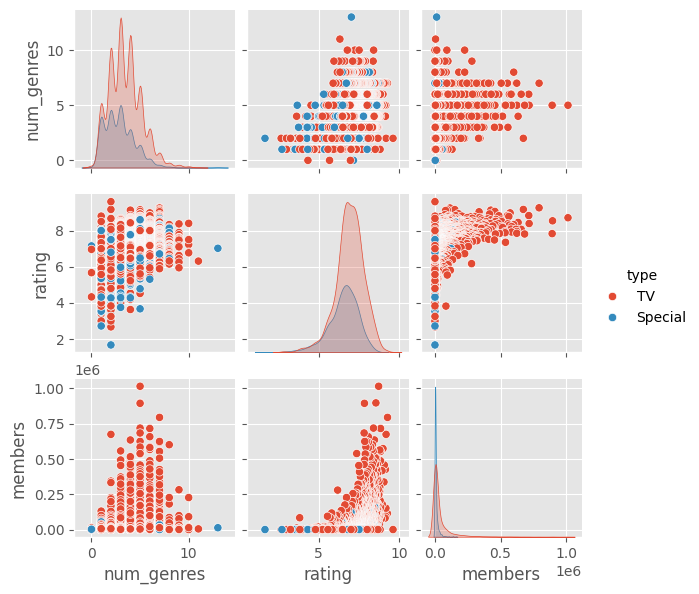

↓↓↓ Pairplot для типа: ('TV', 'Music') ↓↓↓


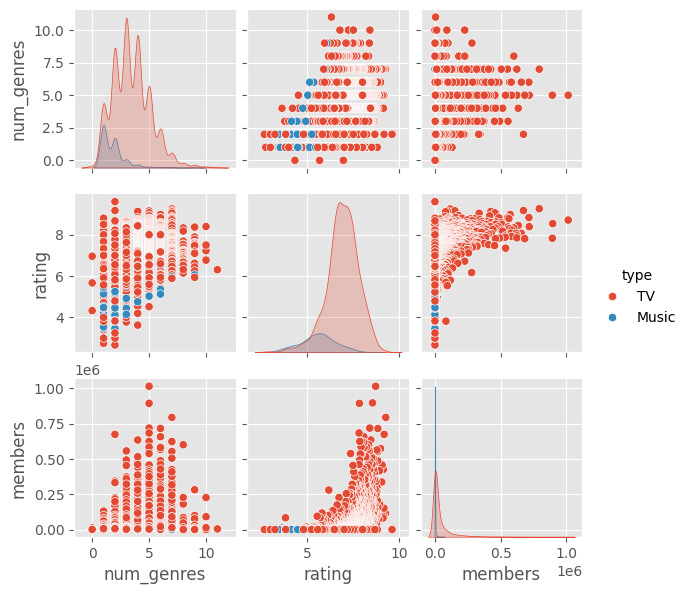

↓↓↓ Pairplot для типа: ('TV', 'ONA') ↓↓↓


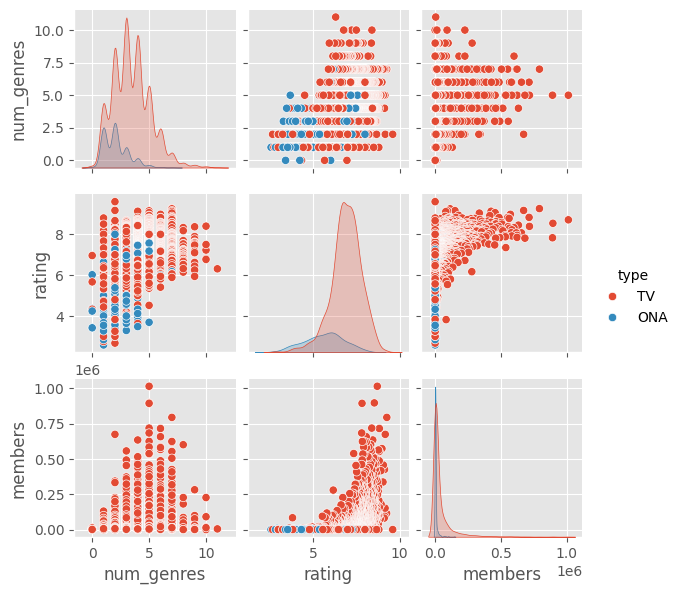

↓↓↓ Pairplot для типа: ('OVA', 'Special') ↓↓↓


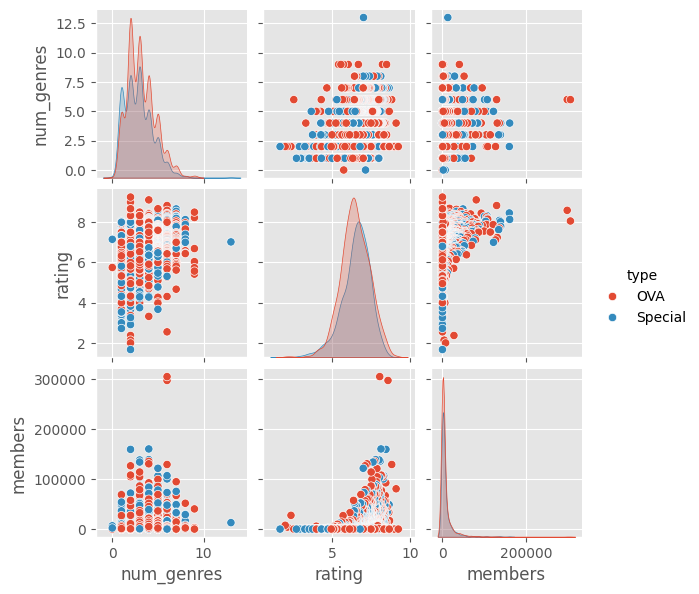

↓↓↓ Pairplot для типа: ('OVA', 'Music') ↓↓↓


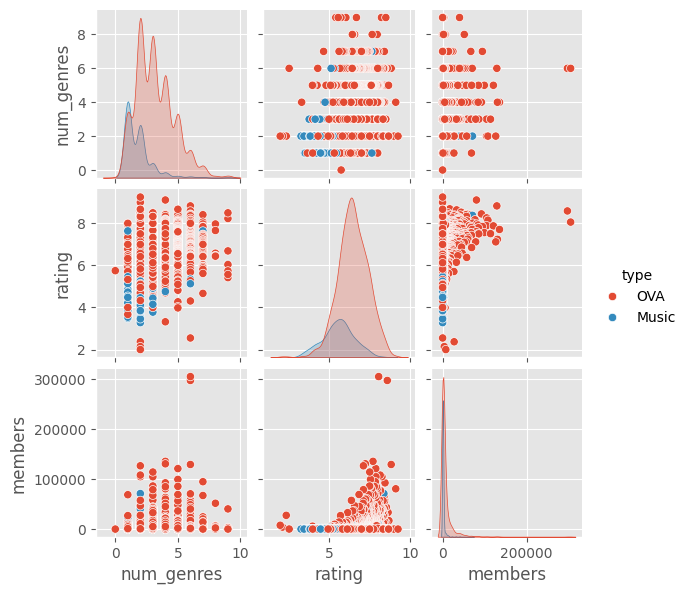

↓↓↓ Pairplot для типа: ('OVA', 'ONA') ↓↓↓


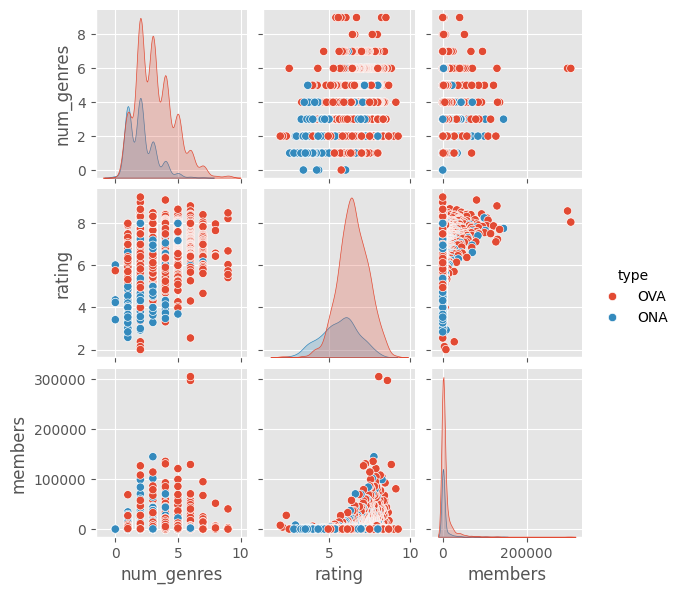

↓↓↓ Pairplot для типа: ('Special', 'Music') ↓↓↓


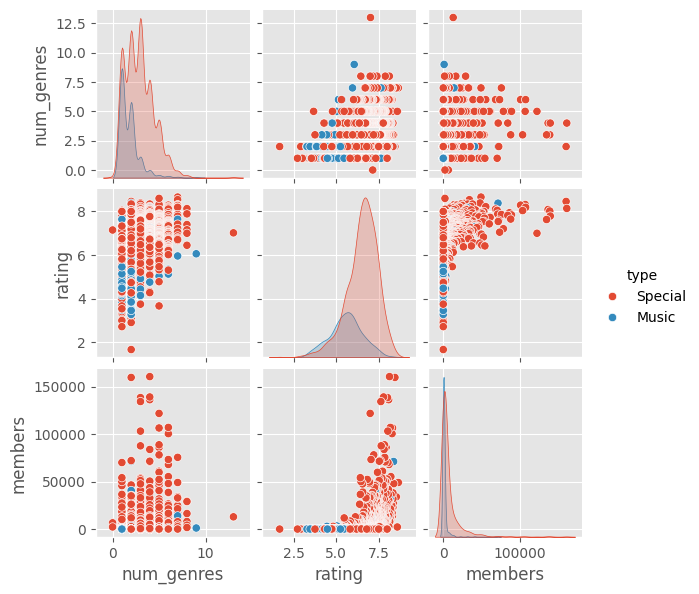

↓↓↓ Pairplot для типа: ('Special', 'ONA') ↓↓↓


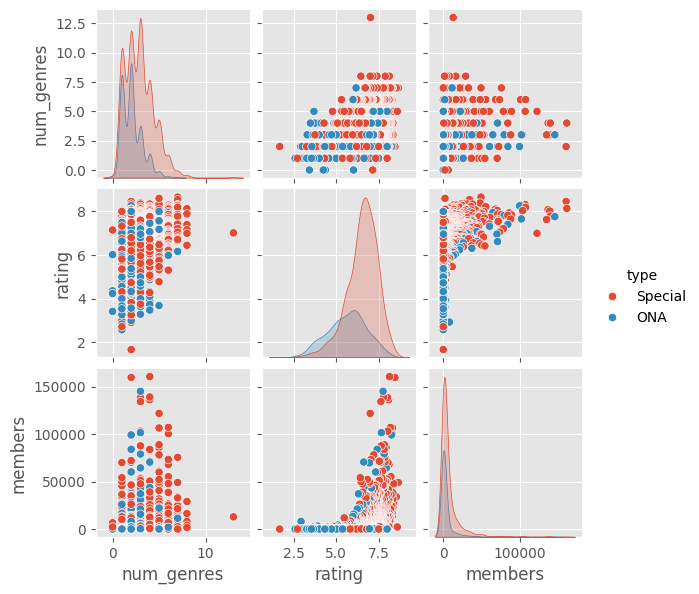

↓↓↓ Pairplot для типа: ('Music', 'ONA') ↓↓↓


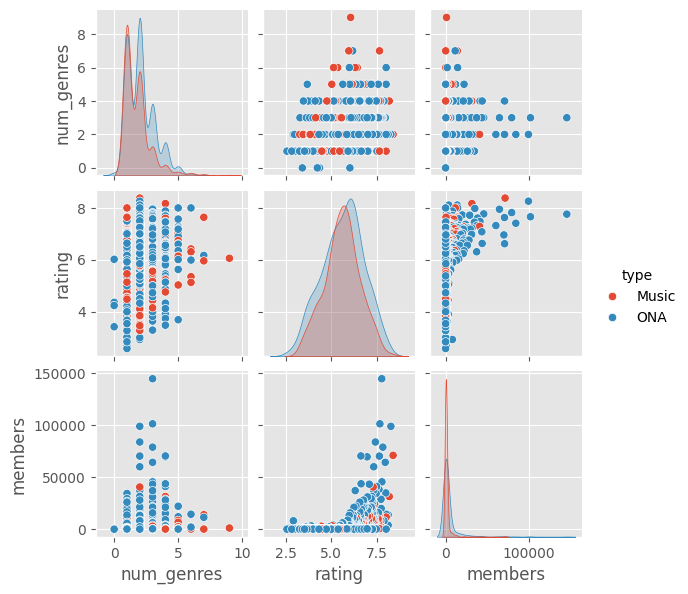

In [ ]:
df['num_genres'] = df['genre'].str.split(', ').apply(lambda x: len(x) if isinstance(x, list) else 0)

df_clean = df.dropna(subset=['rating', 'members'])
correlation_by_type = df_clean.groupby('type').apply(lambda x: x[['num_genres', 'rating', 'members']].corr())
print(correlation_by_type)

# Визуализация корреляции для каждого типа аниме
for t in df_clean['type'].unique():
    subset = df_clean[df_clean['type'] == t]
    plt.figure(figsize=(10, 6))
    sns.heatmap(subset[['num_genres', 'rating', 'members']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'Корреляция для типа аниме: {t}')
    plt.show()

for pair in get_pairs(df_clean['type'].unique()):
    subset = df[df['type'].isin(pair)]
    print(f"↓↓↓ Pairplot для типа: {pair} ↓↓↓")
    sns.pairplot(subset, vars=['num_genres', 'rating', 'members'], hue='type', height=2, kind='scatter')
    plt.show()


## 10. Оцените и визуализируйте корреляцию длины названия аниме name с его рейтингом, кол-вом жанров, эпизодов и подписчиков. (1 балл)

             name_length    rating  num_genres  episodes   members
name_length     1.000000  0.124538    0.091414 -0.090262 -0.074273
rating          0.124538  1.000000    0.438382  0.084844  0.387287
num_genres      0.091414  0.438382    1.000000  0.041875  0.268801
episodes       -0.090262  0.084844    0.041875  1.000000  0.051767
members        -0.074273  0.387287    0.268801  0.051767  1.000000


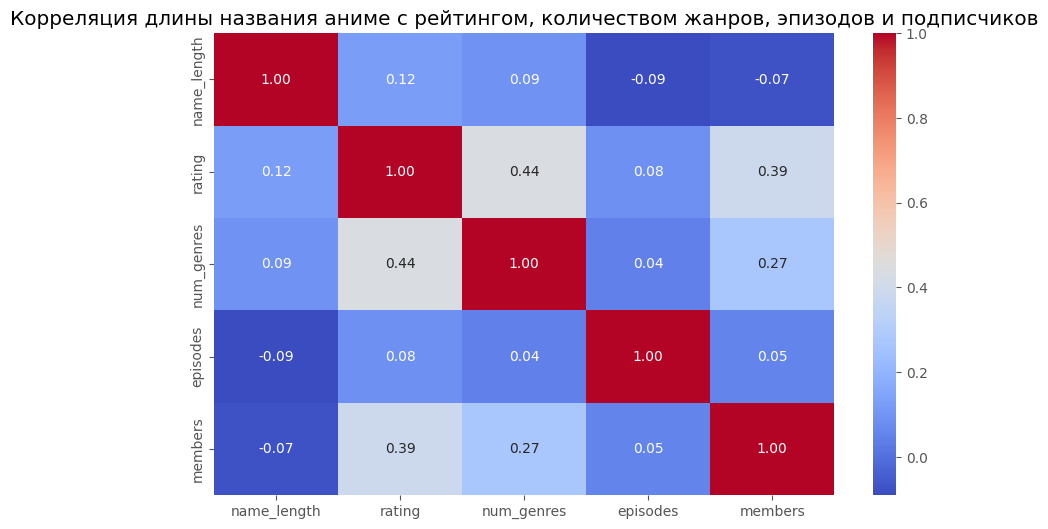

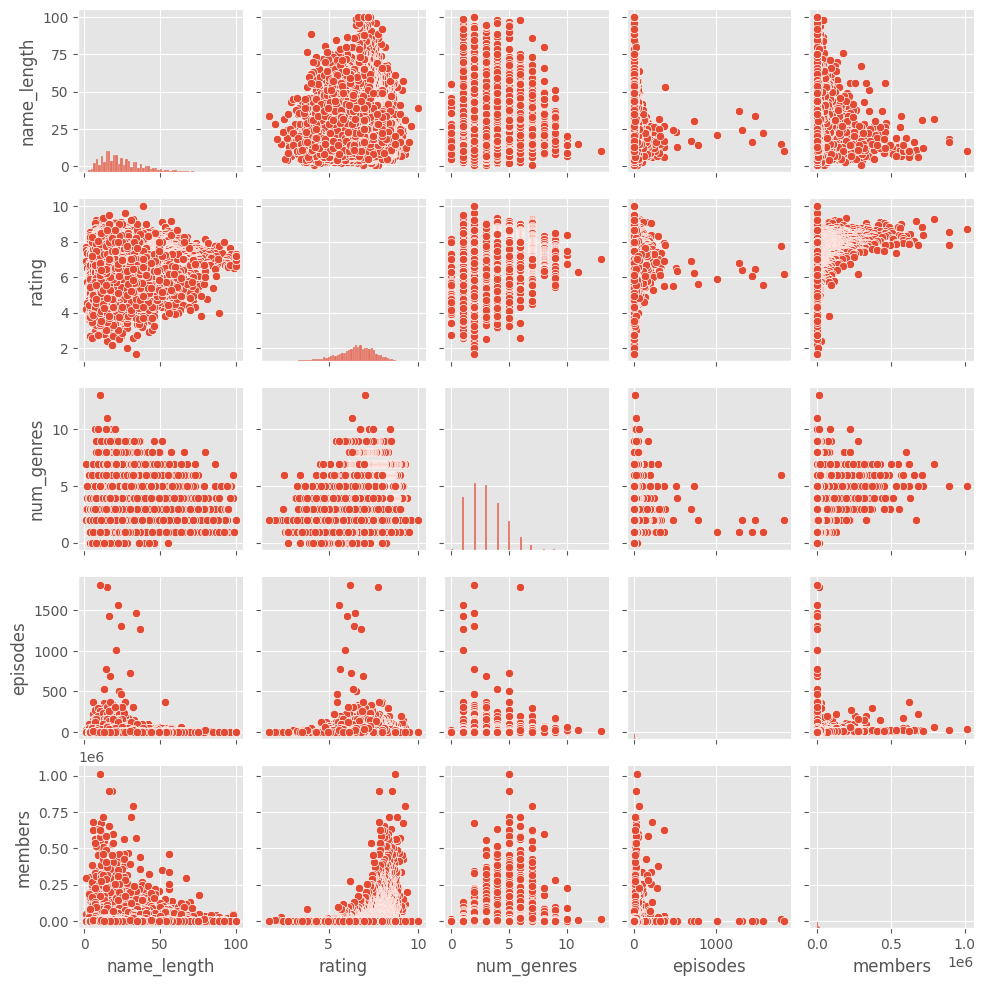

In [ ]:
df['name_length'] = df['name'].apply(lambda x: len(x))
correlation_matrix = df[['name_length', 'rating', 'num_genres', 'episodes', 'members']].corr()
print(correlation_matrix)

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляция длины названия аниме с рейтингом, количеством жанров, эпизодов и подписчиков')

sns.pairplot(df, vars=['name_length', 'rating', 'num_genres', 'episodes', 'members'], height=2, kind='scatter')

plt.show()

# 2. Часть

Каждое задание оценивается 1 баллом в случае полного выполнения

 ### Задание 11: Нормальное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 элементов с нормальным распределением, где среднее  μ=5 и стандартное отклонение σ=1.5.
Описательная статистика \
Рассчитайте выборочное среднее, выборочную медиану, выборочную моду и стандартное отклонение. \
Графическое представление \
Постройте гистограмму и график плотности распределения. Сравните выборочные статистики с теоретическими. \
Анализ отклонений \
Рассчитайте частоту значений, которые отклоняются от среднего на более чем одно стандартное отклонение, и сравните это с теоретическим результатом для нормального распределения.

Выборочное среднее: 4.94
Выборочная медиана: 4.98
Выборочная мода: 4.98
Выборочное стандартное отклонение: 1.54


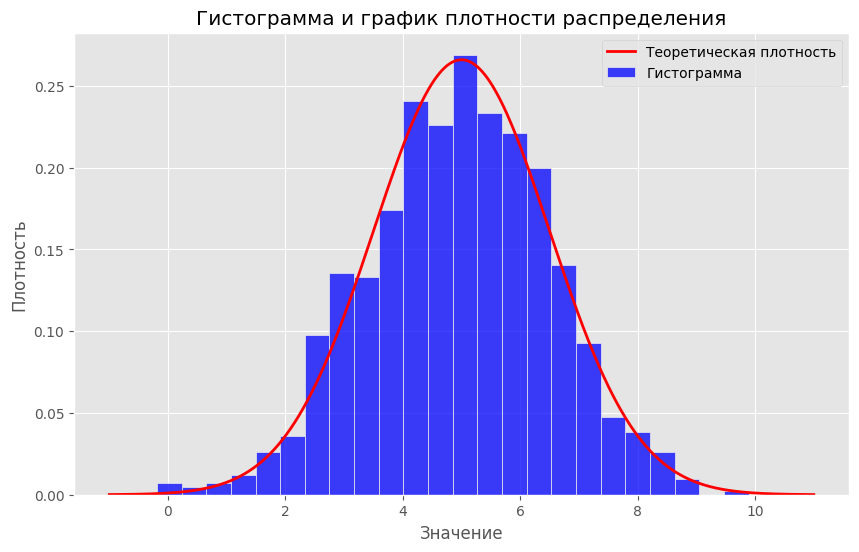

Частота значений, отклоняющихся от среднего более чем одно стандартное отклонение: 0.33
Теоретическая частота: 0.32


In [ ]:
# Параметры распределения
mu = 5
sigma = 1.5
sample_size = 1000

sample = norm.rvs(mu, sigma, size=sample_size)

sample_mean = np.mean(sample)
sample_median = np.median(sample)
sample_mode = np.median(sample)
sample_std = np.std(sample, ddof=1)

print(f"Выборочное среднее: {sample_mean:.2f}")
print(f"Выборочная медиана: {sample_median:.2f}")
print(f"Выборочная мода: {sample_mode:.2f}")
print(f"Выборочное стандартное отклонение: {sample_std:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

plt.figure(figsize=(10, 6))
sns.histplot(sample, kde=False, stat='density', color='blue', label='Гистограмма')

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)
plt.plot(x, y, 'r-', lw=2, label='Теоретическая плотность')

plt.title('Гистограмма и график плотности распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.show()

# Расчет частоты значений, отклоняющихся от среднего на более чем одно стандартное отклонение
deviation_threshold = sample_std
deviation_count = np.sum(np.abs(sample - sample_mean) > deviation_threshold)
deviation_frequency = deviation_count / sample_size

# Теоретическая частота для нормального распределения
theoretical_deviation_frequency = 1 - norm.cdf(1) + norm.cdf(-1)

print(f"Частота значений, отклоняющихся от среднего более чем одно стандартное отклонение: {deviation_frequency:.2f}")
print(f"Теоретическая частота: {theoretical_deviation_frequency:.2f}")

### Задание 12: Экспоненциальное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 элементов из экспоненциального распределения с параметром λ=0.5. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и стандартное отклонение. \
Графическое представление \
Постройте гистограмму и график плотности распределения. \
Анализ распределения \
Определите долю значений в выборке, которые больше двух выборочных средних, и сравните это с теоретической вероятностью для экспоненциального распределения. \

Выборочное среднее: 1.8601
Медиана: 1.3031
Стандартное отклонение: 1.7832


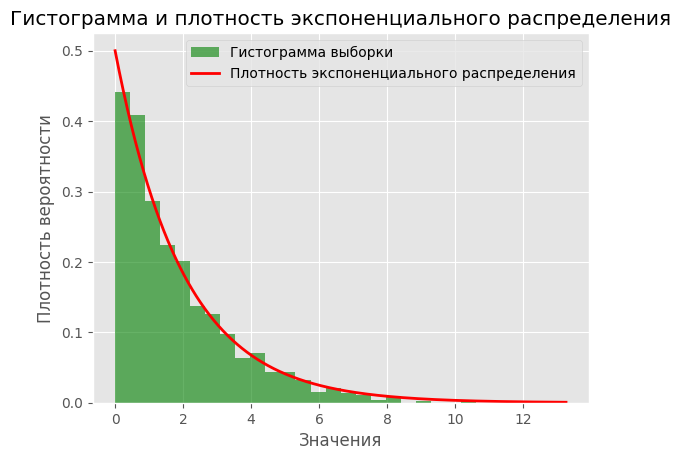

Доля значений больше 3.7202: 0.1330
Теоретическая вероятность: 0.1557


In [ ]:
# Параметр λ
lam = 0.5
sample_size = 1000

sample = expon.rvs(scale=1/lam, size=sample_size)

sample_mean = np.mean(sample)
sample_median = np.median(sample)
sample_std = np.std(sample, ddof=1)

print(f"Выборочное среднее: {sample_mean:.4f}")
print(f"Медиана: {sample_median:.4f}")
print(f"Стандартное отклонение: {sample_std:.4f}")

# Гистограмма выборки
plt.hist(sample, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма выборки')

# Теоретическая плотность распределения
x = np.linspace(0, max(sample), 1000)
pdf = expon.pdf(x, scale=1/lam)
plt.plot(x, pdf, 'r-', lw=2, label='Плотность экспоненциального распределения')

plt.title('Гистограмма и плотность экспоненциального распределения')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

# Доля значений, которые больше двух выборочных средних
threshold = 2 * sample_mean
proportion_above_threshold = np.mean(sample > threshold)

# Теоретическая вероятность для экспоненциального распределения
theoretical_probability = 1 - expon.cdf(threshold, scale=1/lam)

print(f"Доля значений больше {threshold:.4f}: {proportion_above_threshold:.4f}")
print(f"Теоретическая вероятность: {theoretical_probability:.4f}")


### Задание 13: Биномиальное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из биномиального распределения с параметрами  n=10 и p=0.7 \
Описательная статистика \
Найдите выборочное среднее, дисперсию и моду количества успехов. \
Графическое представление \
Постройте столбчатую диаграмму распределения количества успехов. \
Анализ вероятностей \
Вычислите вероятность того, что количество успехов будет больше 8, используя как выборочные данные, так и теоретическую вероятность биномиального распределения. Сравните результаты. \

Выборочное среднее: 6.998
Выборочная дисперсия: 2.11411011011011
Мода: 7


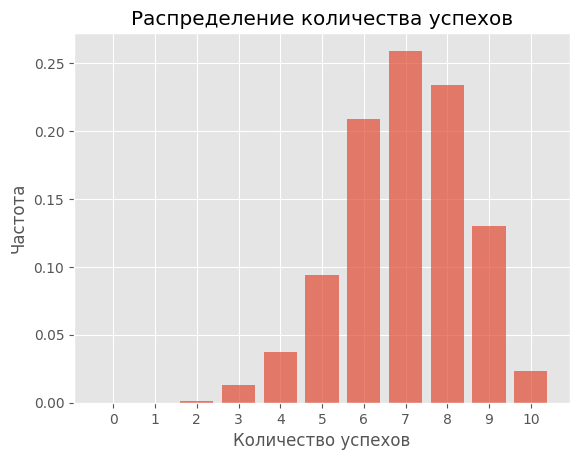

Выборочная вероятность (больше 8 успехов): 0.153
Теоретическая вероятность (больше 8 успехов): 0.14930834589999992
Разница между выборочной и теоретической вероятностью: 0.00369165410000008


In [ ]:
n = 10
p = 0.7
sample_size = 1000

sample = binom.rvs(n, p, size=sample_size)

sample_mean = np.mean(sample)
sample_variance = np.var(sample, ddof=1)
sample_mode = np.bincount(sample).argmax()

print(f"Выборочное среднее: {sample_mean}")
print(f"Выборочная дисперсия: {sample_variance}")
print(f"Мода: {sample_mode}")

plt.hist(sample, bins=range(n+2), align='left', alpha=0.7, rwidth=0.8, density=True)
plt.title('Распределение количества успехов')
plt.xlabel('Количество успехов')
plt.ylabel('Частота')
plt.xticks(range(n+1))
plt.show()

sample_prob = np.mean(sample > 8)
print(f"Выборочная вероятность (больше 8 успехов): {sample_prob}")

from scipy.stats import binom

# Теоретическая вероятность
theoretical_prob = binom.pmf(9, n, p) + binom.pmf(10, n, p)
print(f"Теоретическая вероятность (больше 8 успехов): {theoretical_prob}")

print(f"Разница между выборочной и теоретической вероятностью: {abs(sample_prob - theoretical_prob)}")

### Задание 14: Геометрическое распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из геометрического распределения с вероятностью успеха p=0.3. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и моду количества попыток до первого успеха. \
Графическое представление \
Постройте гистограмму распределения количества попыток. \
Анализ вероятностей \
Определите вероятность того, что потребуется не более 5 попыток для первого успеха, используя как выборочные данные, так и теоретическое геометрическое распределение. Сравните результаты. \

Выборочное среднее: 3.434
Медиана: 3.0
Мода: 1


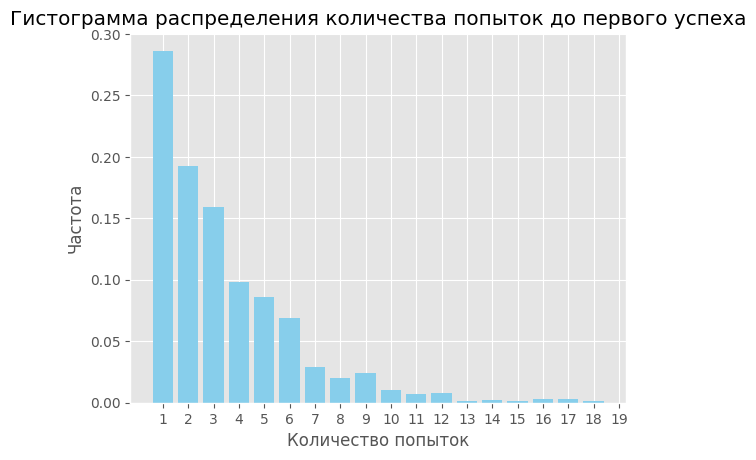

Вероятность (выборочные данные): 0.8210
Вероятность (теоретическое распределение): 0.8319
Разница между выборочной и теоретической вероятностью: 0.0109


In [ ]:
p = 0.3
sample_size = 1000

sample = geom.rvs(p, size=sample_size)

sample_mean = np.mean(sample)
sample_median = np.median(sample)
sample_mode = np.bincount(sample).argmax()

print(f"Выборочное среднее: {sample_mean}")
print(f"Медиана: {sample_median}")
print(f"Мода: {sample_mode}")

plt.hist(sample, bins=range(1, 20), align='left', rwidth=0.8, density=True, color='skyblue')
plt.title('Гистограмма распределения количества попыток до первого успеха')
plt.xlabel('Количество попыток')
plt.ylabel('Частота')
plt.xticks(range(1, 20))
plt.show()

# Вероятность того, что потребуется не более 5 попыток
prob_sample = np.mean(sample <= 5)
print(f"Вероятность (выборочные данные): {prob_sample:.4f}")

prob_theoretical = geom.cdf(5, p)
print(f"Вероятность (теоретическое распределение): {prob_theoretical:.4f}")

print(f"Разница между выборочной и теоретической вероятностью: {abs(prob_sample - prob_theoretical):.4f}")

### Задание 15: Равномерное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из равномерного распределения на отрезке от 3 до 7. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и стандартное отклонение. \
Графическое представление  \
Постройте гистограмму и график плотности распределения. Сравните выборочные статистики с теоретическими значениями для равномерного распределения.
Анализ крайних значений \
Определите долю значений, которые находятся ближе к границам распределения (например, больше 6 или меньше 4), и сравните с ожидаемым результатом для равномерного распределения. \

Выборочное среднее: 4.99
Медиана: 5.02
Стандартное отклонение: 1.16


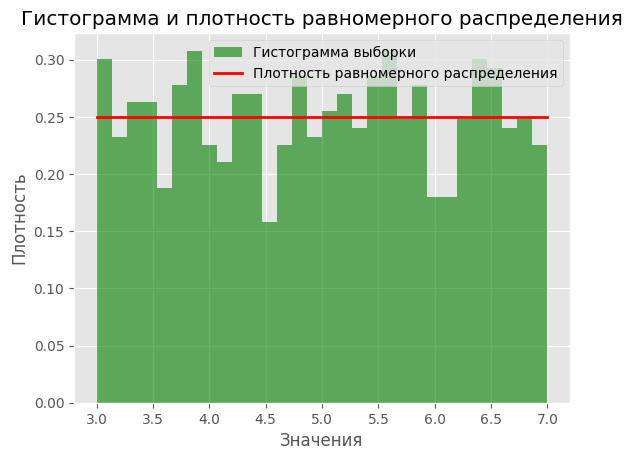

Доля значений меньше 4: 0.26
Доля значений больше 6: 0.24
Теоретическая доля значений меньше 4: 0.25
Теоретическая доля значений больше 6: 0.25


In [ ]:
left = 3
right = 7
sample_size = 1000

sample = np.random.uniform(left, right, sample_size)

sample_mean = np.mean(sample)
sample_median = np.median(sample)
sample_std = np.std(sample, ddof=1)

print(f"Выборочное среднее: {sample_mean:.2f}")
print(f"Медиана: {sample_median:.2f}")
print(f"Стандартное отклонение: {sample_std:.2f}")

plt.hist(sample, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма выборки')
x = np.linspace(left, right, sample_size)
pdf = uniform.pdf(x, loc=3, scale=4)
plt.plot(x, pdf, 'r-', lw=2, label='Плотность равномерного распределения')
plt.title('Гистограмма и плотность равномерного распределения')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.legend()
plt.show()

lower_bound = 4
upper_bound = 6
lower_count = np.sum(sample < lower_bound)
upper_count = np.sum(sample > upper_bound)
total_count = len(sample)
lower_proportion = lower_count / total_count
upper_proportion = upper_count / total_count

print(f"Доля значений меньше {lower_bound}: {lower_proportion:.2f}")
print(f"Доля значений больше {upper_bound}: {upper_proportion:.2f}")

theoretical_lower_proportion = (lower_bound - left) / 4
theoretical_upper_proportion = (right - upper_bound) / 4

print(f"Теоретическая доля значений меньше {lower_bound}: {theoretical_lower_proportion:.2f}")
print(f"Теоретическая доля значений больше {upper_bound}: {theoretical_upper_proportion:.2f}")

### Задание 16: Распределение Пуассона (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из распределения Пуассона с параметром  λ=4. \
Описательная статистика \
Найдите выборочное среднее, дисперсию и моду количества событий. \
Графическое представление \
Постройте столбчатую диаграмму распределения количества событий. \
Анализ вероятностей \
Определите вероятность того, что количество событий будет меньше 3, используя как выборочные данные, так и теоретическое распределение Пуассона. Сравните результаты. \

Выборочное среднее: 3.966
Выборочная дисперсия: 3.6785225225225227
Мода: 3


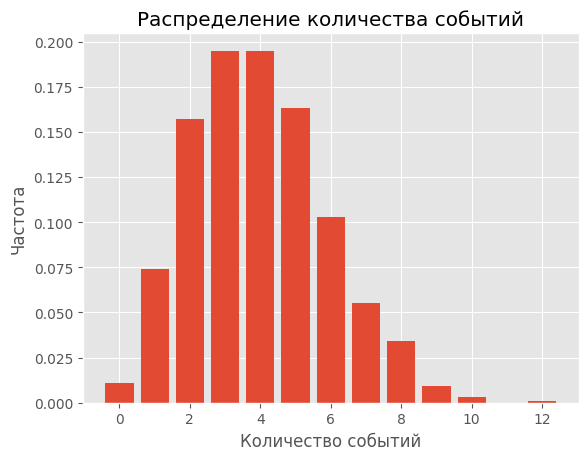

Вероятность (выборочная): 0.242
Вероятность (теоретическая): 0.23810330555354436
Разница между выборочной и теоретической вероятностью: 0.0038966944464556286


In [ ]:
lam = 4
sample_size = 1000

sample = poisson.rvs(mu=lam, size=sample_size)

sample_mean = np.mean(sample)
sample_varince = np.var(sample, ddof=1)
sample_mode = np.bincount(sample).argmax()

print(f"Выборочное среднее: {sample_mean}")
print(f"Выборочная дисперсия: {sample_varince}")
print(f"Мода: {sample_mode}")

plt.hist(sample, bins=range(min(sample), max(sample) + 2), align='left', rwidth=0.8, density=True)
plt.title('Распределение количества событий')
plt.xlabel('Количество событий')
plt.ylabel('Частота')
plt.show()

prob_sample = np.mean(sample < 3)
prob_poisson = poisson.cdf(2, mu=lam)

print(f"Вероятность (выборочная): {prob_sample}")
print(f"Вероятность (теоретическая): {prob_poisson}")
print(f"Разница между выборочной и теоретической вероятностью: {abs(prob_sample - prob_poisson)}")

# 3 Часть

## Задание 17: Проверка несмещённости и состоятельности выборочного среднего рейтингов (3 балла все задание)
1. Вычисление генерального среднего рейтингов \
Рассчитайте выборочное среднее рейтингов всех аниме. \
2. Проверка несмещённости оценки выборочного среднего \
Сгенерируйте 1000 выборок объёма n=100 с возвращением из исходных данных.
Для каждой выборки вычислите выборочное среднее рейтингов.
Постройте гистограмму распределения полученных выборочных средних.
Вычислите среднее из выборочных средних и сравните его с генеральным средним исходных данных. Сделайте вывод о несмещенности оценки. (1 балл)
3. Проверка состоятельности оценки выборочного среднего. \
Повторите шаги из пункта 2 для различных объёмов выборки: n=50, 200, 500.:
Для каждого объёма выборки вычислите дисперсию выборочных средних.
Постройте график зависимости дисперсии выборочных средних от объёма выборки.
Проанализируйте, как дисперсия уменьшается с увеличением объёма выборки. Сделайте вывод о состоятельности оценки. (1 балл)

In [ ]:
def generate_sample_agg(sample_size, agg_function, data = df['rating'].dropna(), num_samples=1000):
    evaluations = []
    for _ in range(num_samples):
        evaluation = np.random.choice(data, sample_size)
        evaluations.append(agg_function(evaluation))
    return evaluations

Генеральное среднее рейтингов: 6.4939


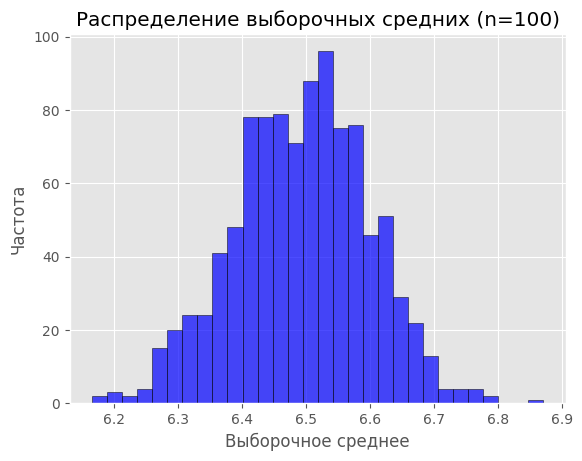

Среднее из выборочных средних: 6.4932
Разница между средним из выборочных средних и средним всего датасета: -0.0007

Поскольку разница между средним из выборочных средних и средним всего датасета невелика,
то в нашем случае оценка получается несмещённой.
При увеличении количества точность будет расти (По ЗБЧ)



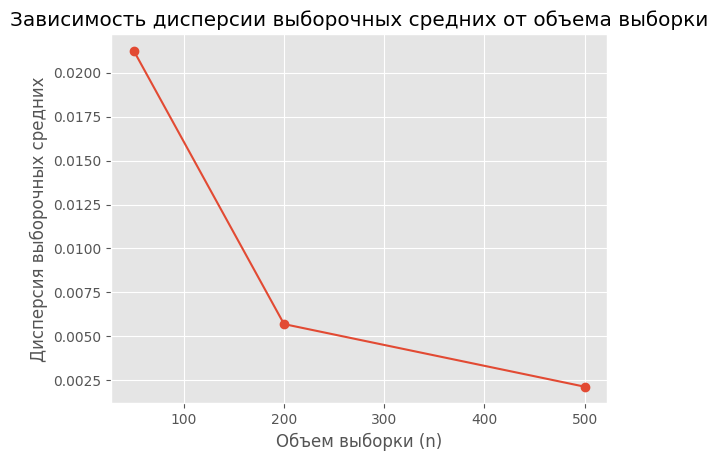

Дисперсия выборочных средних для n=50: 0.0213
Дисперсия выборочных средних для n=200: 0.0057
Дисперсия выборочных средних для n=500: 0.0021
Оценка выборочного среднего является состоятельной,
так как дисперсия выборочных средних уменьшается с увеличением объема выборки.


In [ ]:
# 1. Вычисление генерального среднего рейтингов
general_mean_rating = df['rating'].mean()
print(f"Генеральное среднее рейтингов: {general_mean_rating:.4f}")

# 2. Проверка несмещённости оценки выборочного среднего
sample_size = 100
sample_means = generate_sample_agg(sample_size, np.mean)

plt.hist(sample_means, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Распределение выборочных средних (n=100)')
plt.xlabel('Выборочное среднее')
plt.ylabel('Частота')
plt.show()

mean_of_sample_means = np.mean(sample_means)
print(f"Среднее из выборочных средних: {mean_of_sample_means:.4f}")

print(f"Разница между средним из выборочных средних и средним всего датасета: {mean_of_sample_means - general_mean_rating:.4f}")
print(f"""
Поскольку разница между средним из выборочных средних и средним всего датасета невелика,
то в нашем случае оценка получается несмещённой.
При увеличении количества точность будет расти (По ЗБЧ)
""")

# 3. Проверка состоятельности оценки выборочного среднего.

sample_sizes = [50, 200, 500]

variances = []
for size in sample_sizes:
    sample_means = generate_sample_agg(size, np.mean)
    variance = np.var(sample_means, ddof=1) # Используем несмещенную оценку дисперсии
    variances.append(variance)

plt.plot(sample_sizes, variances, marker='o')
plt.title('Зависимость дисперсии выборочных средних от объема выборки')
plt.xlabel('Объем выборки (n)')
plt.ylabel('Дисперсия выборочных средних')
plt.show()

for n, var in zip(sample_sizes, variances):
    print(f"Дисперсия выборочных средних для n={n}: {var:.4f}")

print("""Оценка выборочного среднего является состоятельной,
так как дисперсия выборочных средних уменьшается с увеличением объема выборки.""")

## Задание 18: Проверка несмещённости и состоятельности медианы рейтингов (3 балла все задание)
1. Вычисление генеральной медианы \
Рассчитайте медиану рейтингов по всему датасету.
2. Проверка несмещённости медианы \
Сгенерируйте 1000 выборок объёма n=100 с возвращением.
Для каждой выборки вычислите медиану рейтингов.
Постройте гистограмму распределения полученных медиан.
Вычислите среднее из медиан и сравните с медианой исходных данных. Сделайте вывод о несмещенности оценки. (1 балл)
3. Проверка состоятельности медианы \
Повторите шаги из пункта 2 для n=50, 200, 500.
Для каждого объёма выборки вычислите стандартное отклонение медиан.
Постройте график зависимости стандартного отклонения медиан от объёма выборки.
Проанализируйте изменение разброса медиан с ростом объёма выборки. Сделайте вывод о состоятельности оценки. (1 балл)

Генеральная медиана рейтингов: 6.6


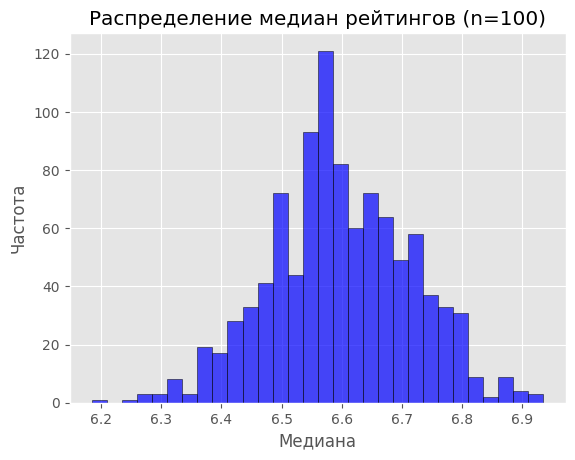

Среднее из медиан (n=100): 6.5979
Разница между средним из медиан и медианой всего датасета: -0.0021

Поскольку разница между средним из медиан и медианой всего датасета невелика,
то в нашем случае оценка получается несмещённой.
При увеличении количества выборок точность будет расти (По ЗБЧ)



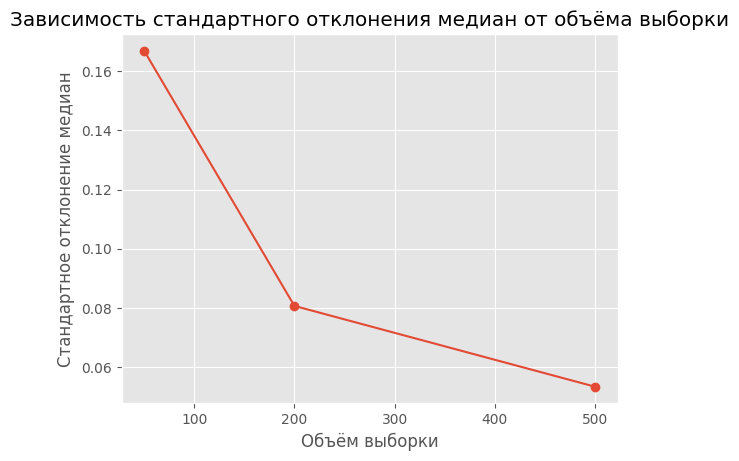

Стандартные отклонения медиан для n=50: 0.1669
Стандартные отклонения медиан для n=200: 0.0807
Стандартные отклонения медиан для n=500: 0.0535

Оценка медианы является состоятельной, так как стандартное отклонение выборочных медиан (а значит и дисперсия выборочных медиан)
уменьшается с увеличением объема выборки.



In [ ]:
# 1. Вычисление генеральной медианы
general_median = df['rating'].median()
print(f"Генеральная медиана рейтингов: {general_median}")

# 2. Проверка несмещённости медианы
sample_size = 100
medians_100 = generate_sample_agg(sample_size, np.median)

plt.hist(medians_100, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Распределение медиан рейтингов (n=100)')
plt.xlabel('Медиана')
plt.ylabel('Частота')
plt.show()

mean_of_medians = np.mean(medians_100)
print(f"Среднее из медиан (n=100): {mean_of_medians:.4f}")

print(f"Разница между средним из медиан и медианой всего датасета: {mean_of_medians - general_median:.4f}")

print(f"""
Поскольку разница между средним из медиан и медианой всего датасета невелика,
то в нашем случае оценка получается несмещённой.
При увеличении количества выборок точность будет расти (По ЗБЧ)
""")

# 3. Проверка состоятельности медианы
sample_sizes = [50, 200, 500]
medians_list = []

for size in sample_sizes:
    sample_medians = generate_sample_agg(size, np.median)
    medians_list.append(sample_medians)

std_devs = [np.std(medians) for medians in medians_list]

plt.plot(sample_sizes, std_devs, marker='o')
plt.title('Зависимость стандартного отклонения медиан от объёма выборки')
plt.xlabel('Объём выборки')
plt.ylabel('Стандартное отклонение медиан')
plt.show()

for n, std in zip(sample_sizes, std_devs):
    print(f"Стандартные отклонения медиан для n={n}: {std:.4f}")


print(f"""
Оценка медианы является состоятельной, так как стандартное отклонение выборочных медиан (а значит и дисперсия выборочных медиан)
уменьшается с увеличением объема выборки.
""")

## Задание 19: Проверка несмещённости и состоятельности выборочной дисперсии рейтингов (3 балла все задание)
1. Вычисление выборочной дисперсии \
Рассчитайте выборочную дисперсию рейтингов по всему датасету.
2. Проверка несмещённости оценки выборочной дисперсии \
Сгенерируйте 1000 выборок объёма n=100 с возвращением.
Для каждой выборки вычислите выборочную дисперсию.
Постройте гистограмму распределения полученных дисперсий.
Вычислите среднее из дисперсий и сравните с выборочной дисперсией исходных данных. Сделайте вывод о несмещенности оценки. (1 балл)
3. Проверка состоятельности оценки выборочной дисперсии \
Повторите шаги из пункта 2 для n=50, 200, 500.
Для каждого объёма выборки вычислите дисперсию оценок выборочной дисперсии.
Постройте график зависимости дисперсии оценок выборочной дисперсии от объёма выборки.
Проанализируйте изменение разброса оценок с ростом объёма выборки.  Сделайте вывод о состоятельности оценки. (1 балл)

Выборочная дисперсия рейтингов по всему датасету: 1.1375


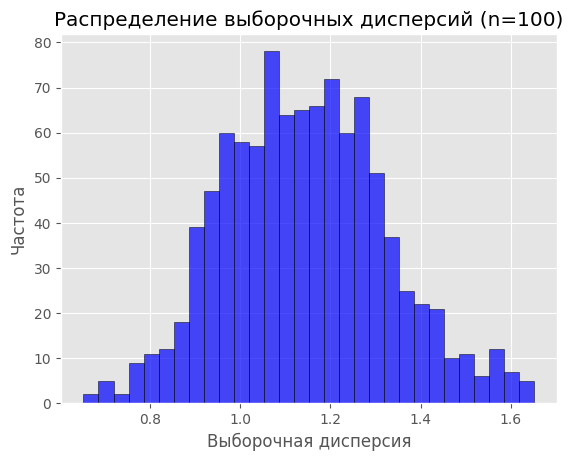

Среднее из выборочных дисперсий (n=100): 1.1438
Разница между средним из дисперсий и дисперсией всего датасета: 0.0063

Поскольку разница между средним из дисперсий и дисперсией всего датасета невелика,
то в нашем случае оценка получается несмещённой.
При увеличении количества выборок точность будет расти (По ЗБЧ)



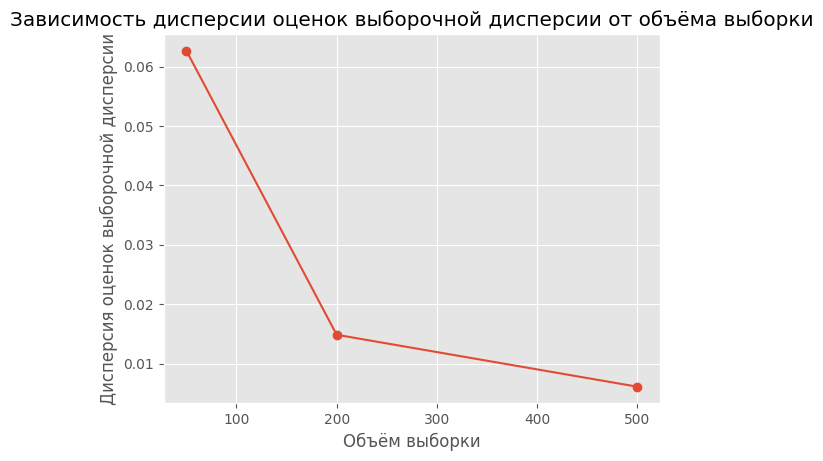

Стандартные отклонения медиан для n=50: 0.0627
Стандартные отклонения медиан для n=200: 0.0149
Стандартные отклонения медиан для n=500: 0.0061

Оценка дисперсии является состоятельной, так как дисперсия выборок
уменьшается с увеличением объема выборки.



In [ ]:
# 1. Вычисление выборочной дисперсии
sample_variance = df['rating'].var(ddof=1)
print(f"Выборочная дисперсия рейтингов по всему датасету: {sample_variance:.4f}")

# 2. Проверка несмещённости оценки выборочной дисперсии
sample_size = 100
sample_variances = generate_sample_agg(sample_size, lambda x: np.var(x, ddof=1))
plt.hist(sample_variances, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Распределение выборочных дисперсий (n=100)')
plt.xlabel('Выборочная дисперсия')
plt.ylabel('Частота')
plt.show()

mean_sample_variance = np.mean(sample_variances)
print(f"Среднее из выборочных дисперсий (n=100): {mean_sample_variance:.4f}")
print(f"Разница между средним из дисперсий и дисперсией всего датасета: {mean_sample_variance - sample_variance:.4f}")

print(f"""
Поскольку разница между средним из дисперсий и дисперсией всего датасета невелика,
то в нашем случае оценка получается несмещённой.
При увеличении количества выборок точность будет расти (По ЗБЧ)
""")

# 3. Проверка несмещённости оценки выборочной дисперсии
sample_sizes = [50, 200, 500]
variances = []
for size in sample_sizes:
    sample_variances = generate_sample_agg(size, lambda x: np.var(x, ddof=1))
    variance = np.var(sample_variances, ddof=1) # Используем несмещенную оценку дисперсии
    variances.append(variance)

plt.plot(sample_sizes, variances, marker='o')
plt.title('Зависимость дисперсии оценок выборочной дисперсии от объёма выборки')
plt.xlabel('Объём выборки')
plt.ylabel('Дисперсия оценок выборочной дисперсии')
plt.show()


for n, var in zip(sample_sizes, variances):
    print(f"Стандартные отклонения медиан для n={n}: {var:.4f}")


print(f"""
Оценка дисперсии является состоятельной, так как дисперсия выборок
уменьшается с увеличением объема выборки.
""")